# Phase 2: Business Ready Visualizations.

## 1. Business Problem Statement

Although total sales are increasing, the business is experiencing declining profitability.
The goal of this analysis is to identify where revenue is generated versus where profit
is lost, and to uncover patterns related to discounts, products, regions, and customers
that may explain margin erosion.

## 2. Why This Matters to the Business
Understanding profit leakage allows leadership to take immediate corrective actions,
such as adjusting discount strategies, discontinuing unprofitable products, and
reallocating inventory and marketing resources toward high-margin areas.


# Execution -

# 1.Import Libraies and load clean data

In [1]:
import pandas as pd

clean_df = pd.read_csv(
    "../data/processed/cleaned_data.csv",
    parse_dates=["Order Date", "Ship Date"]
)

clean_df.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,2016-11-08,2016-11-11,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,...,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,2016-06-12,2016-06-16,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,...,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,2015-10-11,2015-10-18,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,...,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164


In [2]:
clean_df.shape

(9994, 21)

# 2. Dataset Overview

In [3]:
clean_df.info()
clean_df.describe(include="all")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9994 entries, 0 to 9993
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Row ID         9994 non-null   int64         
 1   Order ID       9994 non-null   object        
 2   Order Date     9994 non-null   datetime64[ns]
 3   Ship Date      9994 non-null   datetime64[ns]
 4   Ship Mode      9994 non-null   object        
 5   Customer ID    9994 non-null   object        
 6   Customer Name  9994 non-null   object        
 7   Segment        9994 non-null   object        
 8   Country        9994 non-null   object        
 9   City           9994 non-null   object        
 10  State          9994 non-null   object        
 11  Postal Code    9994 non-null   int64         
 12  Region         9994 non-null   object        
 13  Product ID     9994 non-null   object        
 14  Category       9994 non-null   object        
 15  Sub-Category   9994 n

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,...,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
count,9994.000000,9994,9994,9994,9994,9994,9994,9994,9994,9994,...,9994.000000,9994,9994,9994,9994,9994,9994.000000,9994.000000,9994.000000,9994.000000
unique,NaN,5009,NaN,NaN,4,793,793,3,1,531,...,NaN,4,1862,3,17,1850,NaN,NaN,NaN,NaN
top,NaN,CA-2017-100111,NaN,NaN,Standard Class,WB-21850,William Brown,Consumer,United States,New York City,...,NaN,West,OFF-PA-10001970,Office Supplies,Binders,Staple envelope,NaN,NaN,NaN,NaN
freq,NaN,14,NaN,NaN,5968,37,37,5191,9994,915,...,NaN,3203,19,6026,1523,48,NaN,NaN,NaN,NaN
mean,4997.500000,NaN,2016-04-30 00:07:12.259355648,2016-05-03 23:06:58.571142912,NaN,NaN,NaN,NaN,NaN,NaN,...,55190.379428,NaN,NaN,NaN,NaN,NaN,229.858001,3.789574,0.156203,28.656896
min,1.000000,NaN,2014-01-03 00:00:00,2014-01-07 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,1040.000000,NaN,NaN,NaN,NaN,NaN,0.444000,1.000000,0.000000,-6599.978000
25%,2499.250000,NaN,2015-05-23 00:00:00,2015-05-27 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,23223.000000,NaN,NaN,NaN,NaN,NaN,17.280000,2.000000,0.000000,1.728750
50%,4997.500000,NaN,2016-06-26 00:00:00,2016-06-29 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,56430.500000,NaN,NaN,NaN,NaN,NaN,54.490000,3.000000,0.200000,8.666500
75%,7495.750000,NaN,2017-05-14 00:00:00,2017-05-18 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,90008.000000,NaN,NaN,NaN,NaN,NaN,209.940000,5.000000,0.200000,29.364000
max,9994.000000,NaN,2017-12-30 00:00:00,2018-01-05 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,...,99301.000000,NaN,NaN,NaN,NaN,NaN,22638.480000,14.000000,0.800000,8399.976000


In [4]:
clean_df[['Order Date', 'Ship Date']].dtypes


Order Date    datetime64[ns]
Ship Date     datetime64[ns]
dtype: object

# EDA
# QUESTION 1: Are sales and profit aligned?

In [5]:
clean_df[['Sales', 'Profit']].sum()

Sales     2.297201e+06
Profit    2.863970e+05
dtype: float64

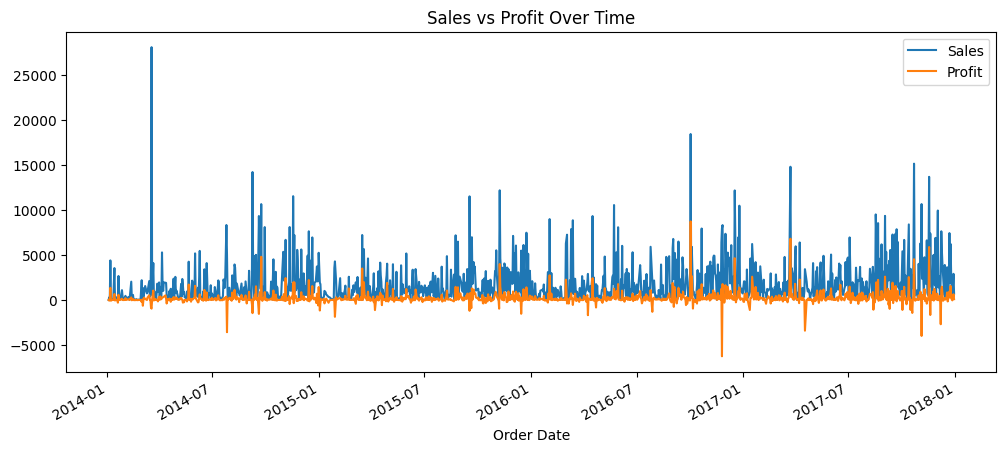

In [6]:
import matplotlib.pyplot as plt

clean_df.groupby('Order Date')[['Sales','Profit']].sum().plot(figsize=(12,5))
plt.title("Sales vs Profit Over Time")
plt.savefig("../visualizations/eda_plots/sales_vs_profit.png")
plt.show()

Sales show an upward trend, while profit is volatile and does not grow proportionally,
indicating margin erosion despite revenue growth.

# QUESTION 2: Which categories generate profit vs loss?

In [7]:
clean_df.groupby('Category')[['Sales','Profit']].sum()

,Sales,Profit
Category,,
Furniture,741999.7953,18451.2728
Office Supplies,719047.0320,122490.8008
Technology,836154.0330,145454.9481


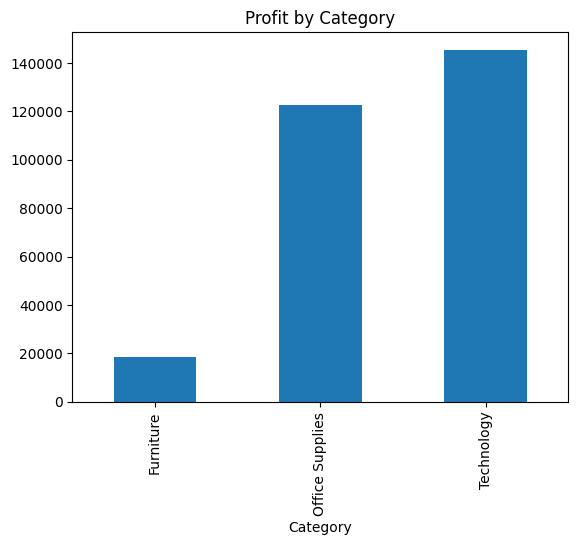

In [15]:
clean_df.groupby('Category')['Profit'].sum().plot(kind='bar', title="Profit by Category")
plt.savefig("../visualizations/eda_plots/profit_by_category.png")
plt.show()

Not all revenue-generating categories are profitable. Some categories contribute
significant sales volume but low or negative profit.

# QUESTION 3: Are discounts destroying profit?

In [9]:
clean_df.groupby('Discount')['Profit'].mean().head(10)

Discount
0.00     66.900292
0.10     96.055074
0.15     27.288298
0.20     24.702572
0.30    -45.679636
0.32    -88.560656
0.40   -111.927429
0.45   -226.646464
0.50   -310.703456
0.60    -43.077212
Name: Profit, dtype: float64

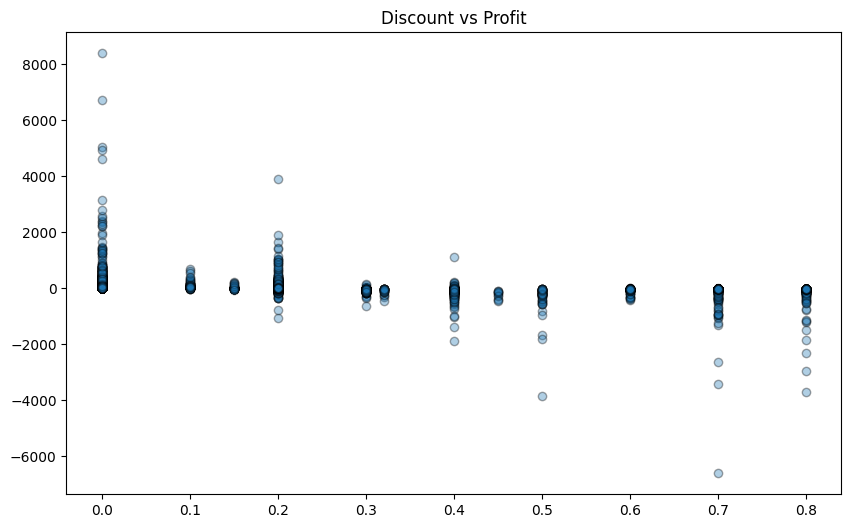

In [10]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_df['Discount'],clean_df['Profit'],alpha=0.35,edgecolors='k')
plt.title("Discount vs Profit")
plt.savefig("../visualizations/eda_plots/discount_vs_profit.png")
plt.show()

Higher discount levels are strongly associated with negative profit, suggesting
that discounts are not always demand-generating and may be eroding margins.

# QUESTION 4: Which regions are risky?

In [11]:
clean_df.groupby('Region')[['Sales','Profit']].sum()

,Sales,Profit
Region,,
Central,501239.8908,39706.3625
East,678781.2400,91522.7800
South,391721.9050,46749.4303
West,725457.8245,108418.4489


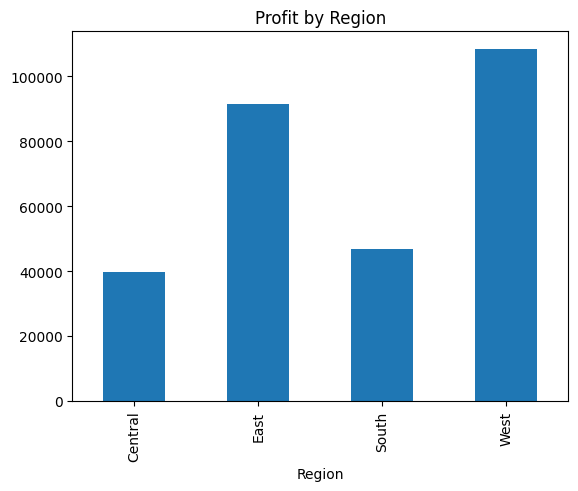

In [12]:
clean_df.groupby('Region')['Profit'].sum().plot(kind='bar', title="Profit by Region")
plt.savefig("../visualizations/eda_plots/profit_by_region.png")
plt.show()

Certain regions generate strong sales but weak profit, indicating
operational or pricing inefficiencies.

#  QUESTION 5: Are there unprofitable customers?

In [13]:
clean_df.groupby('Customer ID')['Profit'].sum().describe()

count     793.000000
mean      361.156396
std       894.261812
min     -6626.389500
25%        36.613100
50%       227.833800
75%       560.007800
max      8981.323900
Name: Profit, dtype: float64

### 1. Number of Customers

* **793 unique customers**

### 2. Central Tendency

* **Median profit = ₹227.83**

  * More reliable than mean
  * Indicates most customers are **modestly profitable**
* **Mean profit = ₹361.16**

  * Higher than median → **right-skewed distribution**
  * A few very profitable customers pull the average up

### 3. Risk Signals 

* **Minimum profit = –₹6,626**

  * Strong evidence of **highly unprofitable customers**
* **High standard deviation (₹894)**

  * Indicates large variability in customer value
  * Confirms uneven profit contribution

### 4. Customer Profit Distribution

* 25% of customers earn **≤ ₹36 profit**
* Top 25% earn **> ₹560**
* Shows **classic Pareto-like behavior** in retail